In [1]:
import pandas as pd
import statistics as sts
import seaborn as srn

In [2]:
df = pd.read_csv('tempo.csv', sep = ';')
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [3]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [4]:
# Dados categóricos
group = df.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

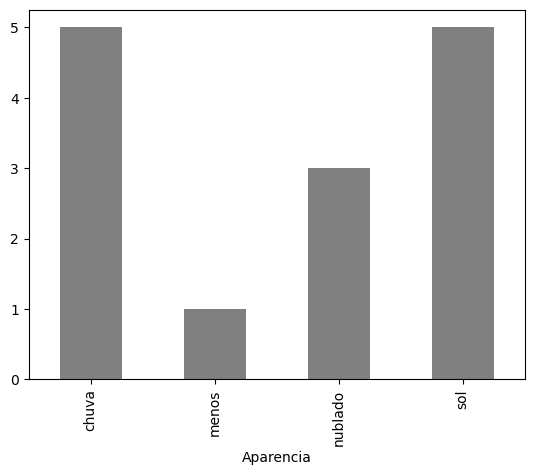

In [5]:
group.plot.bar(color="gray")

In [6]:
df['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

In [7]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [8]:
group = df.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<Axes: xlabel='Aparencia'>

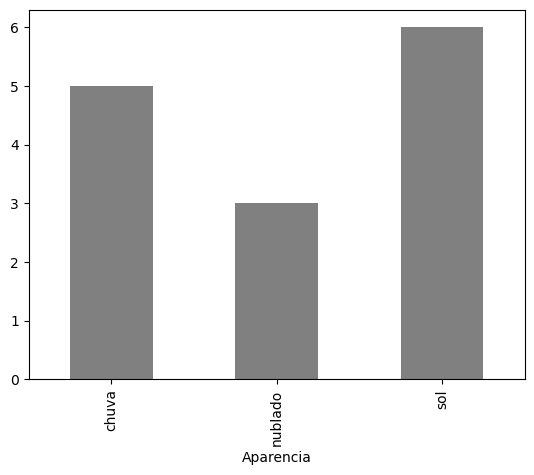

In [9]:
group.plot.bar(color="gray")

In [10]:
group = df.groupby(['Jogar']).size()
group

Jogar
nao    5
sim    9
dtype: int64

In [11]:
df['Jogar'].isnull().sum()

0

<Axes: xlabel='Jogar'>

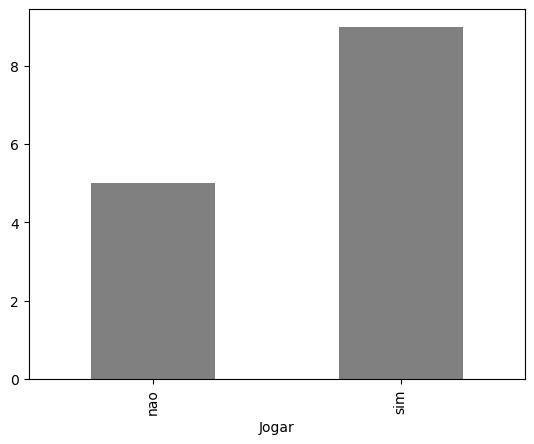

In [12]:
group.plot.bar(color="gray")

In [13]:
df['Vento'].isnull().sum()

1

In [14]:
df['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

Text(0.5, 1.0, 'Vento')

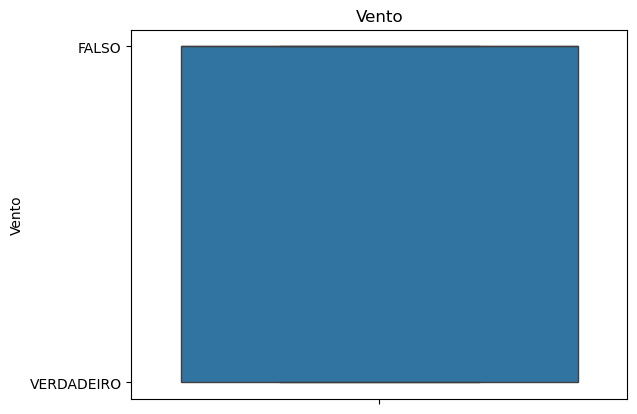

In [25]:
srn.boxplot(df['Vento']).set_title('Vento')

In [27]:
df['Vento'] = df['Vento'].fillna('FALSO')
df['Vento'].isnull().sum()

0

In [29]:
group = df.groupby(['Vento']).size()
group

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

Text(0.5, 1.0, 'Vento')

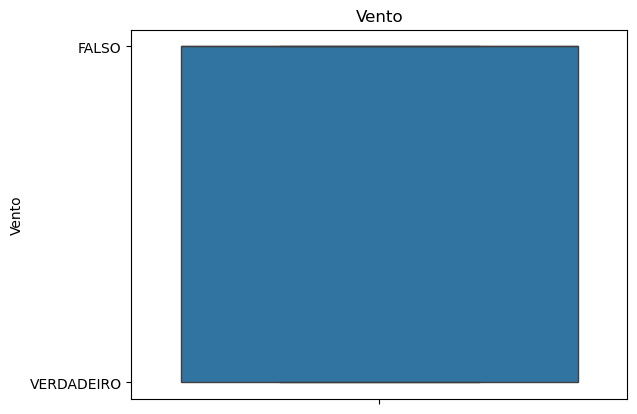

In [31]:
srn.boxplot(df['Vento']).set_title('Vento')

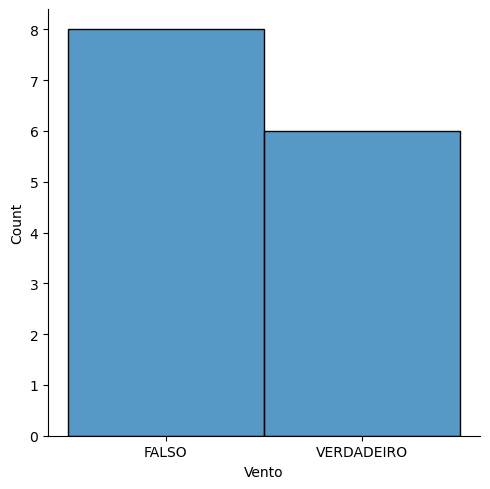

In [33]:
srn.displot(df['Vento'])

In [35]:
df['Umidade'].isnull().sum()

1

In [37]:
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

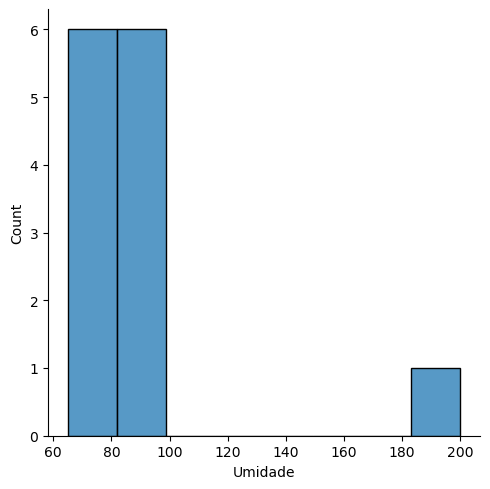

In [39]:
srn.displot(df['Umidade'])

In [41]:
# Tratando umidade com a mediana
mediana = sts.median(df['Umidade'])
mediana

85.5

In [61]:
df.loc[df['Umidade'] > 100, 'Umidade'] = mediana
df['Umidade'] = df['Umidade'].fillna(mediana)
df['Umidade'].describe()

count    14.000000
mean     80.428571
std       9.714892
min      65.000000
25%      70.875000
50%      82.500000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

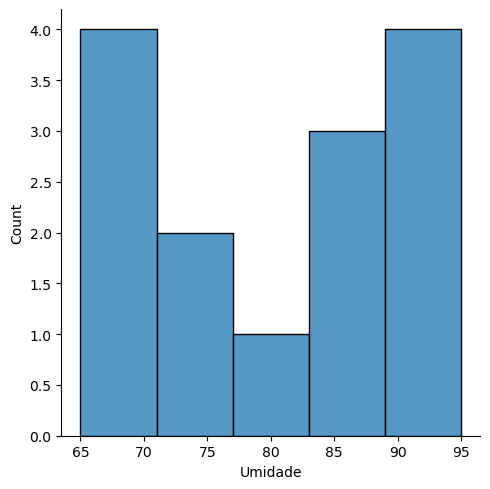

In [63]:
srn.displot(df['Umidade'])

In [47]:
df["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [49]:
df.loc[(df['Temperatura'] < -130.0) | (df['Temperatura'] > 130.0) , 'Temperatura']

7    1220
Name: Temperatura, dtype: int64

In [ ]:
srn.displot(df['Temperatura'])

In [51]:
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [57]:
df.loc[(df['Temperatura'] < -130.0) | (df['Temperatura'] > 130.0) , 'Temperatura'] = mediana
df["Temperatura"].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

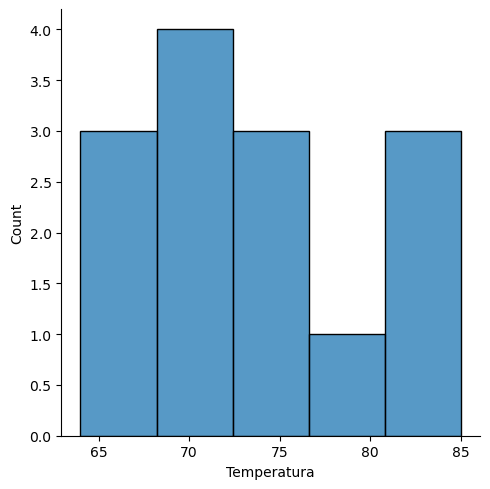

In [55]:
srn.displot(df['Temperatura'])

In [65]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,73.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
